In [3]:
#/The goal of this model project is to show the indent in the population
##if treatment for heart diseases was not available in the United States.from
from modsim import *



In [4]:
#in millions
#US population was at 325.7 million in 2017
#84 million people suffer from coronary heart disease annually

US = System(birth_rate = .125, t_0 = 2017, t_end = 2050,
           w_treatment = 960, wo_treatment = 1049, popt_0 = 325.7*(10**6),
           death_rate = -0.082)
#init = State(p = popt_0)


In [5]:

  

def run_simulation(system):
    treated = TimeSeries()
    untreated = TimeSeries()
    results = TimeSeries()
    
    treated[system.t_0] = system.popt_0
    untreated[system.t_0] = system.popt_0
    
    #for t in linrange (system.t_0, system.t_end):
        #treated[t+1] = treated[t] - system.w_treatment*365.25
        #untreated[t+1] = untreated[t] - system.wo_treatment*365.25 - system.w_treatment
    
    
    #this is population without without our model
    for t in linrange (system.t_0, system.t_end):
        treated[t+1] = treated[t] 
        untreated[t+1] = untreated[t] 
        
    net_growth = treated[t]*system.birth_rate + treated[t]*system.death_rate
    net_growth2 = untreated[t]*system.birth_rate + untreated[t]*system.death_rate
    
    treated = treated+net_growth
    untreated = untreated+net_growth2
    
    return treated, untreated
        
def plot_results(timeseries, timeseries2, title):
    plot(timeseries, ':', label = 'treated')
    plot(timeseries2, '--', label = 'untreated')
    decorate(xlabel = 'Year', 
             ylabel = 'Population',
             title = title)
    
    
    
    
    

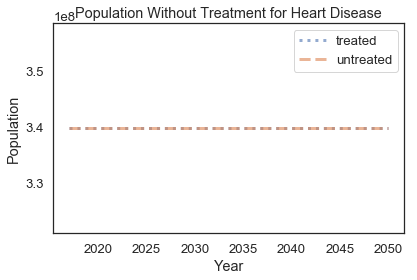

In [6]:
orig, model  = run_simulation(US)

run_simulation(US)
plot_results(orig, model, 
             'Population Without Treatment for Heart Disease')
